## Plotting burnt area over time

In [1]:
%load_ext autoreload
%autoreload

import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

import os
from   io     import StringIO
import numpy  as np
import pandas as pd
import csv

import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import iris.coord_categorisation
import cftime
import nc_time_axis
import numpy.ma as ma
%matplotlib inline
import cartopy.crs as ccrs
from   libs.plot_maps    import *

Load in burnt area data

In [13]:
dir = '../outputs/model_runs/'
file = 'canopy.nc'

dir_obs = '../outputs/'
file_obs = 'fire2000-2014_masked_test2.nc'

cubes = iris.load_cube(dir + file, 'burnt_area')
cubes_obs = iris.load_cube(dir_obs + file_obs)

In [14]:
print(cubes)
print(cubes_obs)

burnt_area / (1)                    (time: 168; latitude: 144; longitude: 192)
     Dimension coordinates:
          time                           x              -               -
          latitude                       -              x               -
          longitude                      -              -               x
     Auxiliary coordinates:
          forecast_period                x              -               -
     Scalar coordinates:
          forecast_reference_time: 1850-01-01 00:00:00
     Attributes:
          Conventions: CF-1.5
variable / (1)                      (time: 168; latitude: 144; longitude: 192)
     Dimension coordinates:
          time                           x              -               -
          latitude                       -              x               -
          longitude                      -              -               x
     Attributes:
          Conventions: CF-1.5
          Data from GFEDv4.1s: Raw data file list on data/gfed/fil

Plot when collapsed over time 

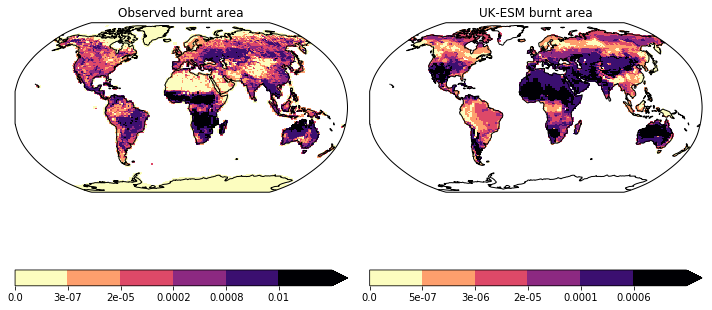

In [22]:
canopy_lon_lat = cubes.collapsed('time', iris.analysis.MEAN)
canopy_lon_lat.long_name = 'UK-ESM burnt area'
canopy_obs_lon_lat = cubes_obs.collapsed('time', iris.analysis.MEAN)
canopy_obs_lon_lat.long_name = 'Observed burnt area'


plt.figure(figsize = (10, 7.5))

plot_lonely_cube(canopy_obs_lon_lat, 1, 2, 1, cmap = 'magma_r', levels = None)
plot_lonely_cube(canopy_lon_lat, 1, 2, 2, cmap = 'magma_r', levels = None)

Timeline plot of modelled burnt_area

In [32]:
print(cubes)
print(cubes_obs)

burnt_area / (1)                    (time: 168; latitude: 144; longitude: 192)
     Dimension coordinates:
          time                           x              -               -
          latitude                       -              x               -
          longitude                      -              -               x
     Auxiliary coordinates:
          forecast_period                x              -               -
     Scalar coordinates:
          forecast_reference_time: 1850-01-01 00:00:00
     Attributes:
          Conventions: CF-1.5
variable / (1)                      (time: 168; latitude: 144; longitude: 192)
     Dimension coordinates:
          time                           x              -               -
          latitude                       -              x               -
          longitude                      -              -               x
     Attributes:
          Conventions: CF-1.5
          Data from GFEDv4.1s: Raw data file list on data/gfed/fil

In [18]:
# Aim: find the min of each year, then the mean of that

canopy_t = cubes.collapsed(['longitude','latitude'], iris.analysis.SUM)
canopy_yr = canopy_t.aggregated_by(['year'],iris.analysis.MEAN)
print(canopy_yr)

# canopy_t_obs = cubes_obs.collapsed(['longitude','latitude'], iris.analysis.SUM)
# canopy_yr_obs = canopy_t_obs.aggregated_by(['year'],iris.analysis.MEAN)
# print(canopy_t_obs)
# print(canopy_yr_obs)

variable / (1)                      (time: 168)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          latitude: 0.0 degrees, bound=(-89.375, 89.375) degrees
          longitude: 180.9375 degrees, bound=(0.9375, 360.9375) degrees
     Attributes:
          Conventions: CF-1.5
          Data from GFEDv4.1s: Raw data file list on data/gfed/file_list.txt
          Data obtained on: 2019-02-14 14:12:05
          NCO: 4.7.2
          created_by: R, packages ncdf4 and raster (version 2.6-7)
          date: 2019-07-05 13:33:09
          git Repository URL: https://github.com/douglask3/LimFIRE.git
          git Revision Number: c2e91e4
          git info by: gitBasedProjects 3.10
          history: Wed Sep  4 11:06:51 2019: ncatted -a calendar,time,c,c,360_day fire200...
          max: [0.47235473 0.53642191 0.81430228 0.79855162 0.73440839 0.89358276
 0.82952994...
          min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [30]:
t_start = cftime.Datetime360Day(2000, 1, 1)
t_fin = cftime.Datetime360Day(2014, 1, 1)

xtick = [cftime.Datetime360Day(n, 1, 1) for n in range(2000, 2015, 2)]

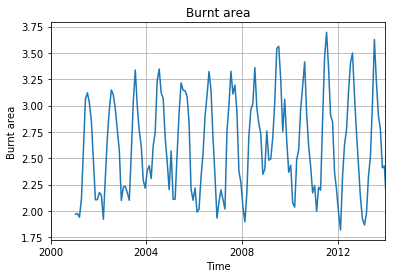

In [31]:
qplt.plot(canopy_t)
plt.xlim(t_start, t_fin)
plt.grid()
# plt.xticks(xtick)

qplt.show()

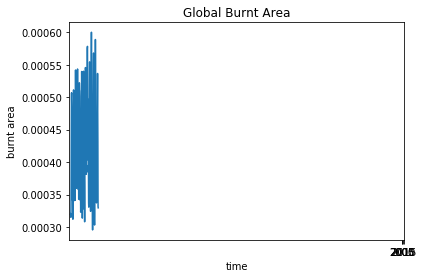

In [46]:
dat = canopy_t.data

plt.plot(dat)
plt.xlabel('time')
plt.ylabel('burnt area')
plt.title('Global Burnt Area')
plt.xticks([2000,2005,2010,2015])
plt.show()